In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv

In [2]:
USwines = pd.read_csv("USwines.csv")

In [3]:
USwines.drop(columns = ["Unnamed: 0","country"], inplace=True)

In [4]:
USwines

,description,designation,points,price,province,region_1,region_2,variety,winery,year
0,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Pinot Gris,Rainstorm,2013
1,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,UNK_region_2,Riesling,St. Julian,2013
2,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Sweet Cheeks,2012
3,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Napa Valley,Napa,Cabernet Sauvignon,Kirkland Signature,2011
4,"Slightly reduced, this wine offers a chalky, t...",NaN,87,34.0,California,Alexander Valley,Sonoma,Cabernet Sauvignon,Louis M. Martini,2012
5,Building on 150 years and six generations of w...,NaN,87,12.0,California,Central Coast,Central Coast,Chardonnay,Mirassou,2012
6,"Red fruit aromas pervade on the nose, with cig...",NaN,87,32.0,Virginia,Virginia,UNK_region_2,Meritage,Quiévremont,2012
7,Ripe aromas of dark berries mingle with ample ...,Vin de Maison,87,23.0,Virginia,Virginia,UNK_region_2,Red Blend,Quiévremont,2012
8,"A sleek mix of tart berry, stem and herb, alon...",NaN,87,20.0,Oregon,Oregon,Oregon Other,Pinot Noir,Acrobat,2013
9,This wine from the Geneseo district offers aro...,Signature Selection,87,22.0,California,Paso Robles,Central Coast,Merlot,Bianchi,2011


In [5]:
region_1 = pd.get_dummies(USwines["region_1"])
region_2 = pd.get_dummies(USwines["region_2"])
variety = pd.get_dummies(USwines["variety"])
winery = pd.get_dummies(USwines["winery"])
year = pd.get_dummies(USwines["year"])
province = pd.get_dummies(USwines["province"])

points = pd.DataFrame(USwines["points"])
price = pd.DataFrame(USwines["price"])

In [6]:
data = pd.concat([price, province, points, region_1, variety, year], axis = 1)

In [7]:
data.shape

(54265, 591)

In [8]:
data.to_csv("data.csv")

## Train Test Split

In [9]:
X = pd.concat([points, province, region_1, variety, year], axis = 1)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, price, test_size=0.2, random_state=101)

## Linear regression

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
lin_reg = LinearRegression()

In [14]:
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [15]:
pred_train_lin = lin_reg.predict(X_train)
pred_test_lin = lin_reg.predict(X_test)

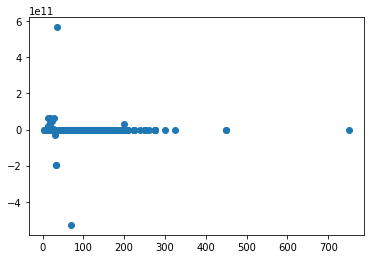

In [17]:
plt.scatter(y_test,pred_test_lin)

## Evaluation

In [18]:
from sklearn import metrics

In [19]:
metrics.mean_squared_error(y_train,pred_train_lin)

435.2156063229574

In [20]:
metrics.mean_squared_error(y_test,pred_test_lin)

6.421164021192879e+19

## ridge

In [21]:
from sklearn.linear_model import Ridge

In [22]:
ridge = Ridge(alpha=0.1)

In [23]:
ridge.fit(X_train,y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [24]:
pred_train_ridge = ridge.predict(X_train)
pred_test_ridge = ridge.predict(X_test)

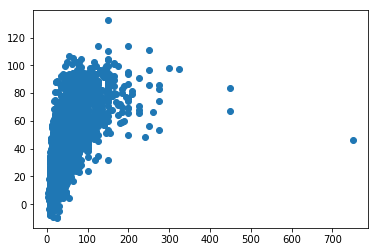

In [25]:
plt.scatter(y_test,pred_test_ridge)

In [26]:
metrics.mean_squared_error(y_train,pred_train_ridge)

435.23038343864386

In [27]:
metrics.mean_squared_error(y_test,pred_test_ridge)

394.7309802256326